# Etude du DF total

## Importer les librairies

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


### Obtenir l'info complète du DF

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Importer le DF

In [53]:
df= pd.read_csv("gaming_total.csv", index_col=0)
df.head()

Name Platform    Year         Genre Publisher  \
0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     41.49     29.02      3.77         8.46         82.74   
1     29.08      3.58      6.81         0.77         40.24   
2     15.85     12.88      3.79         3.31         35.82   
3     15.75     11.01      3.28         2.96         33.00   
4     11.27      8.89     10.22         1.00         31.37   

                                           developpeur_goo  \
0                                           Nintendo, PLUS   
1                                                      NaN   
2                                                      NaN   
3  Nintendo, Nintendo Entertainment Analysis & Development   
4                                                      NaN   

     distributeur_goo langue_goo PEGI_goo game_series_goo game_mode_goo  \
0                 NaN        NaN      NaN             NaN           NaN   
1  Universal Pictures    Anglais      NaN             NaN           NaN   
2                 NaN        NaN      NaN             NaN           NaN   
3                 NaN        NaN      NaN             NaN   Multijoueur   
4                 NaN        NaN      NaN             NaN           NaN   

   Rank_x developpeur_wiki  langue_wiki PEGI_wiki  \
0       1     Nintendo EAD  Multilingue      7+ ?   
1       2              NaN          NaN       NaN   
2       3     Nintendo EAD  Multilingue      3+ ?   
3       4              NaN          NaN       NaN   
4       5              NaN          NaN       NaN   

                                                          game_mode_wiki  \
0                                      Un joueur\nMultijoueur (de 2 à 4)   
1                                                                    NaN   
2  Local\n1 à 4 joueurs\nEn ligne (jusqu'au 20 mai 2014)\n2 à 12 joueurs   
3                                                                    NaN   
4                                                                    NaN   

   Rank_y test_note_JVC avis_count_JVC avis_note_JVC Classification_Age_JVC  \
0       1            14          (687)          13.8                 +7 ans   
1       2            19            (3)            19                 +3 ans   
2       3            16         (3023)          17.4                 +3 ans   
3       4            15          (581)          16.5                 +3 ans   
4       5       no_data        no_data       no_data                    NaN   

                                 max_joueurs_JVC  \
0                              Jusqu'à 4 joueurs   
1                                            NaN   
2  4 joueurs en écran partagé, 12 joueurs online   
3                              Jusqu'à 4 joueurs   
4                                            NaN   

                                 Mode_JVC                        Support_JVC  \
0                                     NaN                                DVD   
1                         Jouable en solo  eShop Console Virtuelle Cartouche   
2  Multi sur le même écran Multi en ligne                                DVD   
3                                     NaN                                DVD   
4                                     NaN                                NaN   

                            Langue_JVC  
0  Voix en français Textes en français  
1                                  NaN  
2                                  NaN  
3  Voix en français Textes en français  
4                                  NaN

In [54]:
df = df.replace('no_data', np.nan)

In [55]:
# définir une expression régulière pour extraire les 2 premiers mots qui suivent "voix"
pattern = re.compile(r'\bvoix\W+(\w+\W+){0,1}\w+\b', flags=re.IGNORECASE)

# extraire les 2 premiers mots qui suivent "voix" pour chaque chaîne de caractères
df['langue_parlée_JVC'] = df['Langue_JVC'].apply(lambda x: pattern.search(str(x)).group(0) if pattern.search(str(x)) else None)

# définir une expression régulière pour extraire les 2 premiers mots qui suivent "Textes"
pattern = re.compile(r'\btextes\W+(\w+\W+){0,1}\w+\b', flags=re.IGNORECASE)

# extraire les 2 premiers mots qui suivent "Textes" pour chaque chaîne de caractères
df['texte_JVC'] = df['Langue_JVC'].apply(lambda x: pattern.search(str(x)).group(0) if pattern.search(str(x)) else None)


In [56]:
# fonction pour extraire le premier chiffre d'une chaîne de caractères
def extract_first_number(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    else:
        return None

# appliquer la fonction à la colonne 'max_joueurs' pour extraire le premier chiffre
df['nb_joueurs_JVC'] = df['max_joueurs_JVC'].apply(lambda x: extract_first_number(str(x)))
df['Classification_Age_JVC'] = df['Classification_Age_JVC'].apply(lambda x: extract_first_number(str(x)))

In [57]:
df=df.drop(['Rank_x', 'Rank_y'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 0 to 16471
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    16472 non-null  object 
 1   Platform                16472 non-null  object 
 2   Year                    16201 non-null  float64
 3   Genre                   16472 non-null  object 
 4   Publisher               16414 non-null  object 
 5   NA_Sales                16472 non-null  float64
 6   EU_Sales                16472 non-null  float64
 7   JP_Sales                16472 non-null  float64
 8   Other_Sales             16472 non-null  float64
 9   Global_Sales            16472 non-null  float64
 10  developpeur_goo         1487 non-null   object 
 11  distributeur_goo        14 non-null     object 
 12  langue_goo              73 non-null     object 
 13  PEGI_goo                501 non-null    object 
 14  game_series_goo         511 non-null  

In [58]:
df['avis_count_JVC']= df['avis_count_JVC'].apply(lambda x: x.replace('(', '').replace(')', '') if isinstance(x, str) else x)

In [59]:
#df.to_csv('VG_Sales_Note.csv')

In [60]:
df.describe(include='all')

Name Platform          Year   Genre  \
count                         16472    16472  16201.000000   16472   
unique                        11443       31           NaN      12   
top     Need for Speed: Most Wanted       DS           NaN  Action   
freq                             12     2152           NaN    3284   
mean                            NaN      NaN   2006.409913     NaN   
std                             NaN      NaN      5.838520     NaN   
min                             NaN      NaN   1980.000000     NaN   
25%                             NaN      NaN   2003.000000     NaN   
50%                             NaN      NaN   2007.000000     NaN   
75%                             NaN      NaN   2010.000000     NaN   
max                             NaN      NaN   2020.000000     NaN   

              Publisher      NA_Sales      EU_Sales      JP_Sales  \
count             16414  16472.000000  16472.000000  16472.000000   
unique              576           NaN           NaN           NaN   
top     Electronic Arts           NaN           NaN           NaN   
freq               1328           NaN           NaN           NaN   
mean                NaN      0.265648      0.146974      0.078260   
std                 NaN      0.819417      0.506798      0.310358   
min                 NaN      0.000000      0.000000      0.000000   
25%                 NaN      0.000000      0.000000      0.000000   
50%                 NaN      0.080000      0.020000      0.000000   
75%                 NaN      0.240000      0.110000      0.040000   
max                 NaN     41.490000     29.020000     10.220000   

         Other_Sales  Global_Sales developpeur_goo    distributeur_goo  \
count   16472.000000  16472.000000            1487                  14   
unique           NaN           NaN             848                   7   
top              NaN           NaN          Konami  Universal Pictures   
freq             NaN           NaN              17                   6   
mean        0.048213      0.539367             NaN                 NaN   
std         0.189230      1.560041             NaN                 NaN   
min         0.000000      0.010000             NaN                 NaN   
25%         0.000000      0.060000             NaN                 NaN   
50%         0.010000      0.170000             NaN                 NaN   
75%         0.040000      0.480000             NaN                 NaN   
max        10.570000     82.740000             NaN                 NaN   

       langue_goo                             PEGI_goo     game_series_goo  \
count          73                                  501                 511   
unique         36                                  240                 268   
top       Anglais  3 ans et plus | de Electronic Arts.  Animation jeunesse   
freq           13                                   13                  12   
mean          NaN                                  NaN                 NaN   
std           NaN                                  NaN                 NaN   
min           NaN                                  NaN                 NaN   
25%           NaN                                  NaN                 NaN   
50%           NaN                                  NaN                 NaN   
75%           NaN                                  NaN                 NaN   
max           NaN                                  NaN                 NaN   

       game_mode_goo developpeur_wiki  langue_wiki PEGI_wiki game_mode_wiki  \
count            839             3085         1432      1081           2828   
unique           104              977          240        37            267   
top      Multijoueur        EA Canada  Multilingue      3+ ?      Un joueur   
freq             354               95          401       188            490   
mean             NaN              NaN          NaN       NaN            NaN   
std              NaN              NaN          NaN       NaN 

## Suppression des variables non exploitables et des lignes en double

<Axes: >

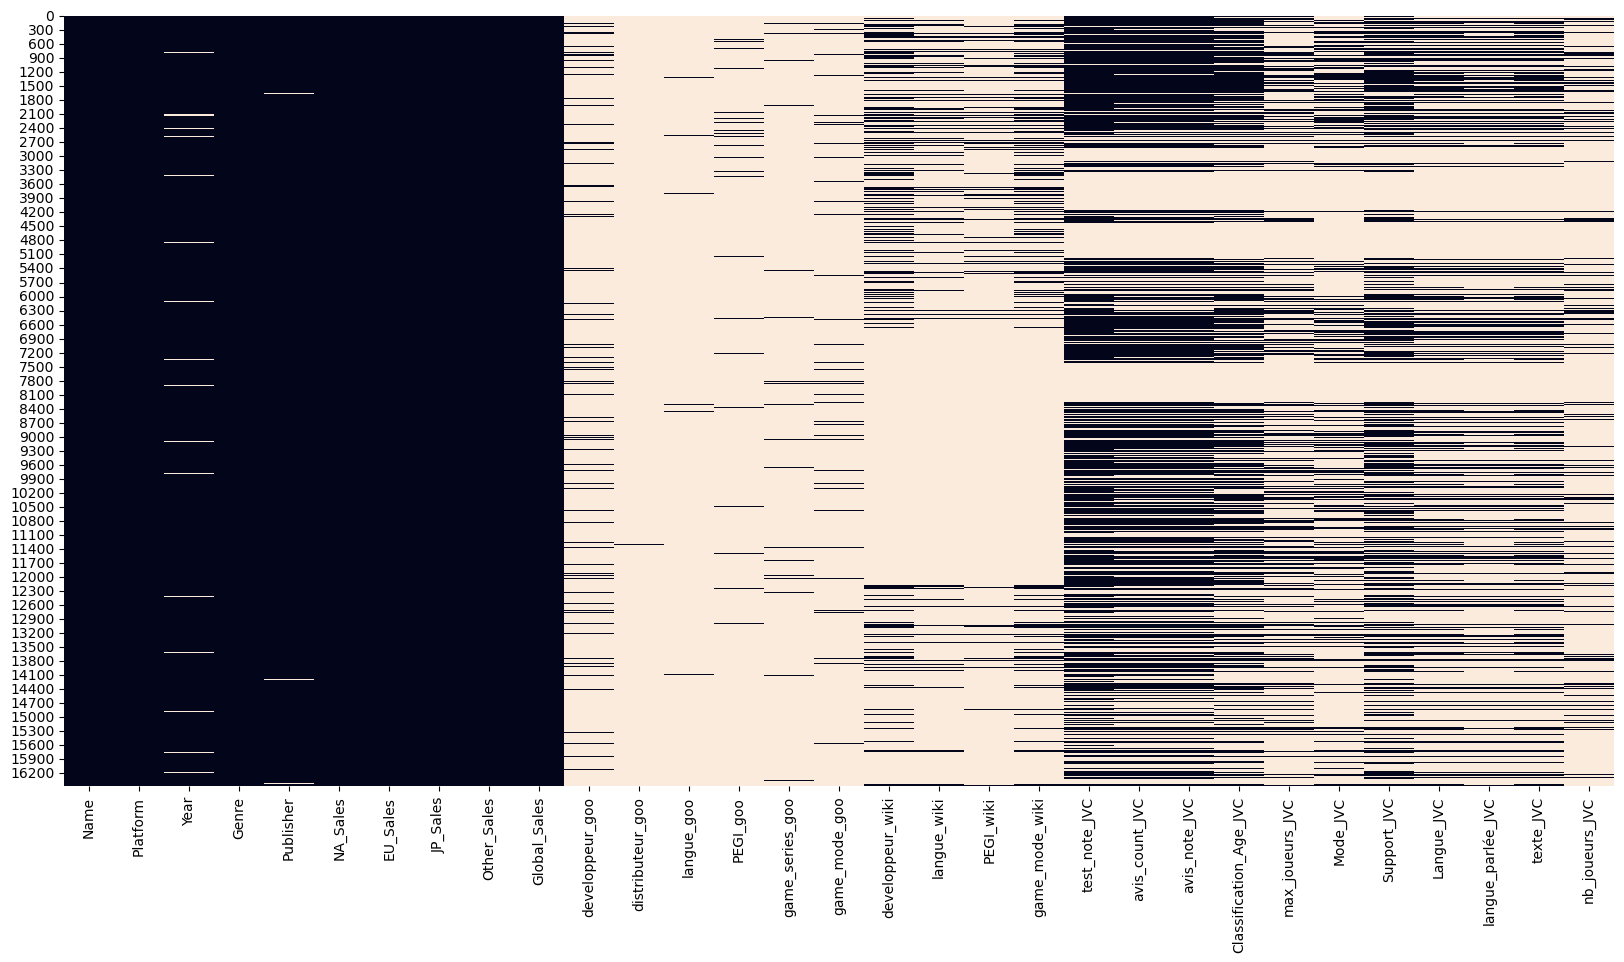

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
# donne une image du datset en entier pour avoir un aperçu des Nans

In [62]:
df= df.drop_duplicates()

In [63]:
df.isna().sum()

Name                          0
Platform                      0
Year                        270
Genre                         0
Publisher                    58
NA_Sales                      0
EU_Sales                      0
JP_Sales                      0
Other_Sales                   0
Global_Sales                  0
developpeur_goo           14984
distributeur_goo          16457
langue_goo                16398
PEGI_goo                  15970
game_series_goo           15960
game_mode_goo             15632
developpeur_wiki          13386
langue_wiki               15039
PEGI_wiki                 15390
game_mode_wiki            13643
test_note_JVC              6553
avis_count_JVC             7449
avis_note_JVC              7449
Classification_Age_JVC     9457
max_joueurs_JVC           12352
Mode_JVC                  12593
Support_JVC                9190
Langue_JVC                11919
langue_parlée_JVC         12569
texte_JVC                 11921
nb_joueurs_JVC            13943
dtype: i

In [64]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Name                      0.000000
Platform                  0.000000
Genre                     0.000000
NA_Sales                  0.000000
EU_Sales                  0.000000
JP_Sales                  0.000000
Other_Sales               0.000000
Global_Sales              0.000000
Publisher                 0.003521
Year                      0.016392
test_note_JVC             0.397851
avis_note_JVC             0.452249
avis_count_JVC            0.452249
Support_JVC               0.557950
Classification_Age_JVC    0.574161
Langue_JVC                0.723635
texte_JVC                 0.723757
max_joueurs_JVC           0.749924
langue_parlée_JVC         0.763099
Mode_JVC                  0.764556
developpeur_wiki          0.812701
game_mode_wiki            0.828304
nb_joueurs_JVC            0.846518
developpeur_goo           0.909720
langue_wiki               0.913059
PEGI_wiki                 0.934369
game_mode_goo             0.949062
game_series_goo           0.968976
PEGI_goo            

In [65]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.7]]
df.head()

Name Platform    Year         Genre Publisher  \
0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales test_note_JVC  \
0     41.49     29.02      3.77         8.46         82.74            14   
1     29.08      3.58      6.81         0.77         40.24            19   
2     15.85     12.88      3.79         3.31         35.82            16   
3     15.75     11.01      3.28         2.96         33.00            15   
4     11.27      8.89     10.22         1.00         31.37           NaN   

  avis_count_JVC avis_note_JVC  Classification_Age_JVC  \
0            687          13.8                     7.0   
1              3            19                     3.0   
2           3023          17.4                     3.0   
3            581          16.5                     3.0   
4            NaN           NaN                     NaN   

                         Support_JVC  
0                                DVD  
1  eShop Console Virtuelle Cartouche  
2                                DVD  
3                                DVD  
4                                NaN

<Axes: >

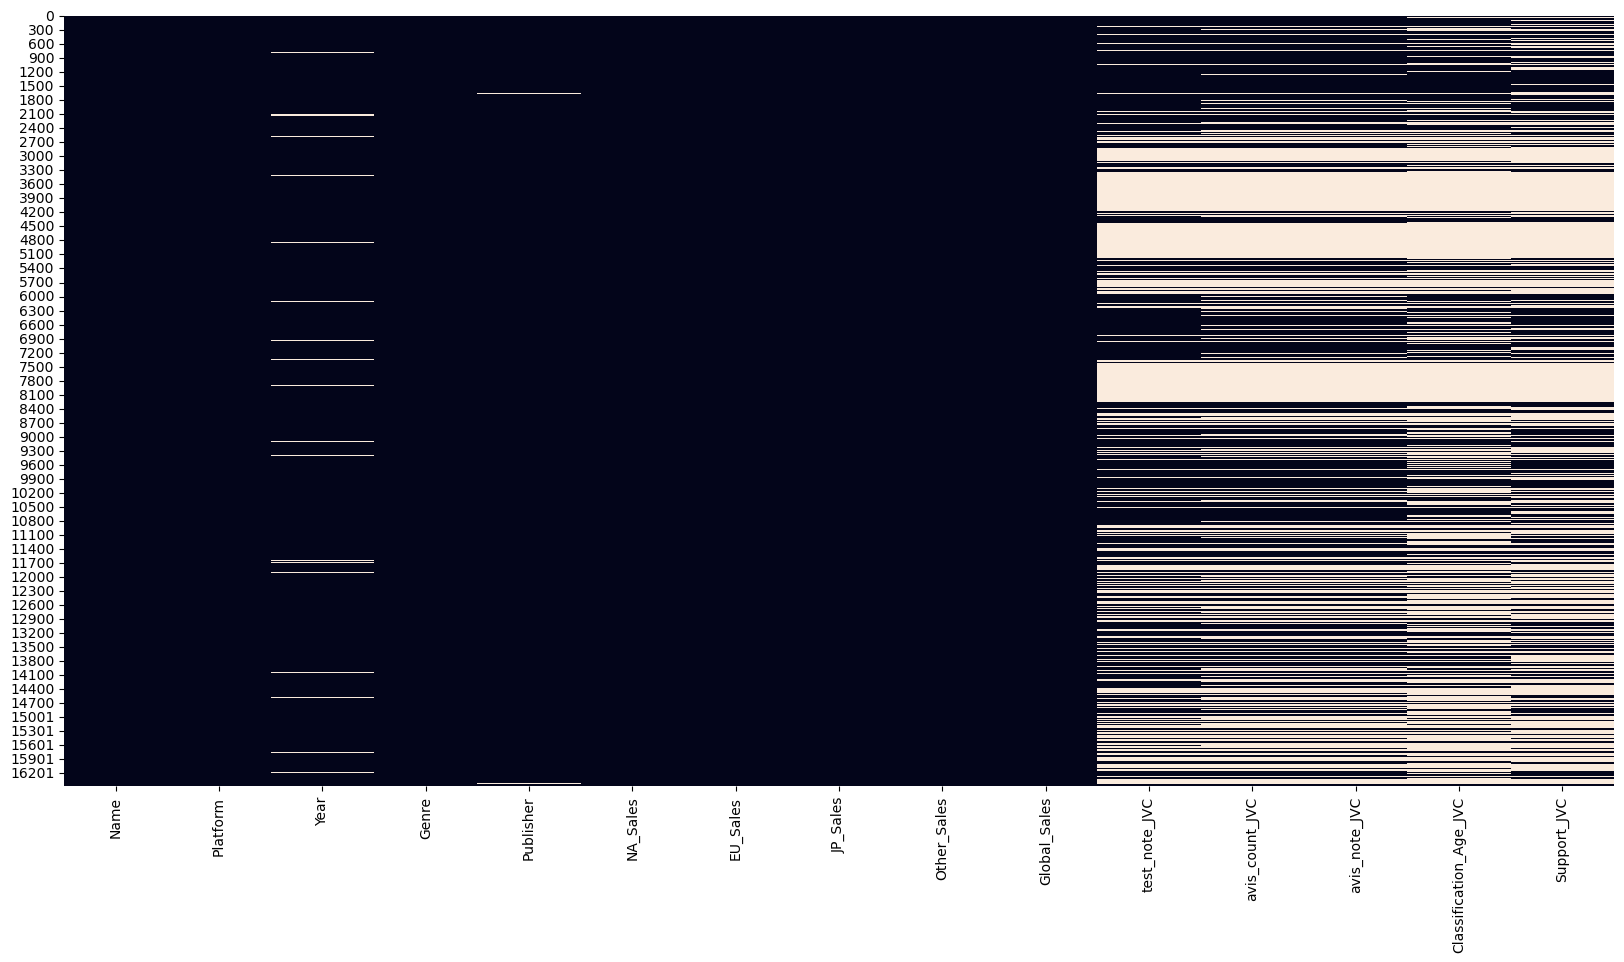

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Traitement des Nans

In [67]:
missing_values = df.isnull().mean() * 100

print('Taux de valeurs manquantes pour chaque colonne :\n', round(missing_values, 2))
print("shape :",df.shape)

Taux de valeurs manquantes pour chaque colonne :
 Name                       0.00
Platform                   0.00
Year                       1.64
Genre                      0.00
Publisher                  0.35
NA_Sales                   0.00
EU_Sales                   0.00
JP_Sales                   0.00
Other_Sales                0.00
Global_Sales               0.00
test_note_JVC             39.79
avis_count_JVC            45.22
avis_note_JVC             45.22
Classification_Age_JVC    57.42
Support_JVC               55.80
dtype: float64
shape : (16471, 15)


In [68]:
df= df.dropna(subset=['Year', 'Publisher', 'test_note_JVC', 'avis_count_JVC',
                      'avis_note_JVC', 'Classification_Age_JVC', 'Support_JVC'])

In [69]:
duplicates = df.duplicated()
print('Il y a', sum(duplicates), 'doublons dans le jeu de données.')

missing_values = df.isnull().mean() * 100

print('Taux de valeurs manquantes pour chaque colonne :\n', round(missing_values, 2))
print("shape :",df.shape)

Il y a 0 doublons dans le jeu de données.
Taux de valeurs manquantes pour chaque colonne :
 Name                      0.0
Platform                  0.0
Year                      0.0
Genre                     0.0
Publisher                 0.0
NA_Sales                  0.0
EU_Sales                  0.0
JP_Sales                  0.0
Other_Sales               0.0
Global_Sales              0.0
test_note_JVC             0.0
avis_count_JVC            0.0
avis_note_JVC             0.0
Classification_Age_JVC    0.0
Support_JVC               0.0
dtype: float64
shape : (5246, 15)


## Nombre de modalités pour chaques variables

In [70]:
for col in df.columns:
   print(col,':' ,df[col].nunique())

Name : 3670
Platform : 27
Year : 37
Genre : 12
Publisher : 285
NA_Sales : 342
EU_Sales : 256
JP_Sales : 191
Other_Sales : 133
Global_Sales : 500
test_note_JVC : 20
avis_count_JVC : 515
avis_note_JVC : 174
Classification_Age_JVC : 7
Support_JVC : 468


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5246 entries, 0 to 16468
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5246 non-null   object 
 1   Platform                5246 non-null   object 
 2   Year                    5246 non-null   float64
 3   Genre                   5246 non-null   object 
 4   Publisher               5246 non-null   object 
 5   NA_Sales                5246 non-null   float64
 6   EU_Sales                5246 non-null   float64
 7   JP_Sales                5246 non-null   float64
 8   Other_Sales             5246 non-null   float64
 9   Global_Sales            5246 non-null   float64
 10  test_note_JVC           5246 non-null   object 
 11  avis_count_JVC          5246 non-null   object 
 12  avis_note_JVC           5246 non-null   object 
 13  Classification_Age_JVC  5246 non-null   float64
 14  Support_JVC             5246 non-null  

## Types de variables 

In [72]:
df.dtypes.value_counts()

object     8
float64    7
dtype: int64

<Axes: >

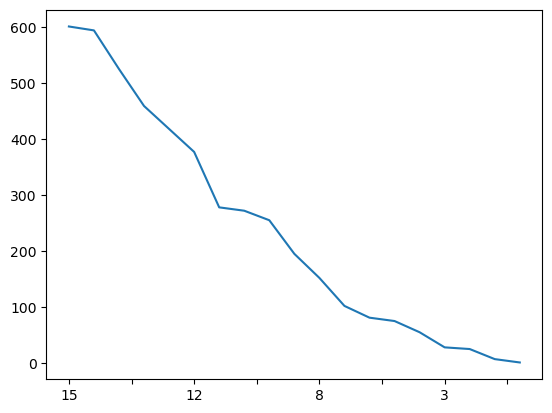

In [73]:
(df['test_note_JVC'].value_counts()[1:].astype(float)).plot()

In [74]:
df['test_note_JVC']=df['test_note_JVC'].replace('--','11')

In [75]:
df['test_note_JVC']= df['test_note_JVC'].astype('float')

In [76]:
df['avis_count_JVC']= df['avis_count_JVC'].astype('float')


<Axes: >

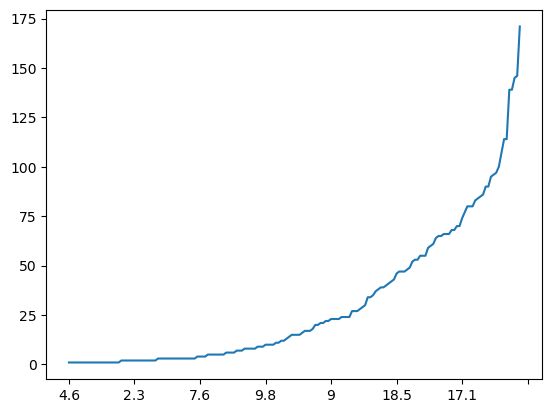

In [77]:
(df['avis_note_JVC'].value_counts(ascending=True)[1:].astype(float)).plot()

In [78]:
df['avis_note_JVC']=df['avis_note_JVC'].replace('--','15')

In [79]:
df['avis_note_JVC']= df['avis_note_JVC'].astype('float')

In [80]:
#df['Year']=pd.to_datetime(df['Year'], format='%Y')
df['Year']= df['Year'].astype('int')

In [81]:
#df['Year']=df['Year'].str.extract('(\d{4})', expand=False)
df.head()

Name Platform  Year     Genre Publisher  NA_Sales  \
0             Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1      Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   
2         Mario Kart Wii      Wii  2008    Racing  Nintendo     15.85   
3      Wii Sports Resort      Wii  2009    Sports  Nintendo     15.75   
6  New Super Mario Bros.       DS  2006  Platform  Nintendo     11.38   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  test_note_JVC  \
0     29.02      3.77         8.46         82.74           14.0   
1      3.58      6.81         0.77         40.24           19.0   
2     12.88      3.79         3.31         35.82           16.0   
3     11.01      3.28         2.96         33.00           15.0   
6      9.23      6.50         2.90         30.01           17.0   

   avis_count_JVC  avis_note_JVC  Classification_Age_JVC  \
0           687.0           13.8                     7.0   
1             3.0           19.0                     3.0   
2          3023.0           17.4                     3.0   
3           581.0           16.5                     3.0   
6          1370.0           17.4                     3.0   

                         Support_JVC  
0                                DVD  
1  eShop Console Virtuelle Cartouche  
2                                DVD  
3                                DVD  
6                          Cartouche

<Axes: >

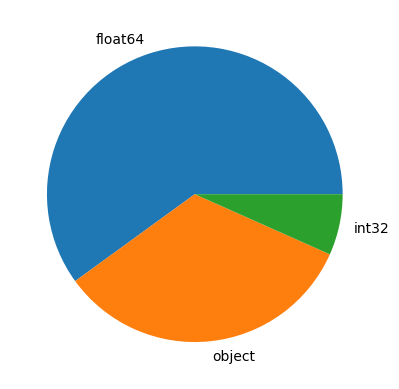

In [82]:
df.dtypes.value_counts().plot.pie()

In [83]:
# Sélectionne toutes les colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64'])

# Sélectionne toutes les colonnes catégorielles
df_cat = df.select_dtypes(include=['object'])


In [84]:
df.to_csv('data_clean.csv')

## Selection de la colonne target

In [85]:
target= df['Global_Sales']

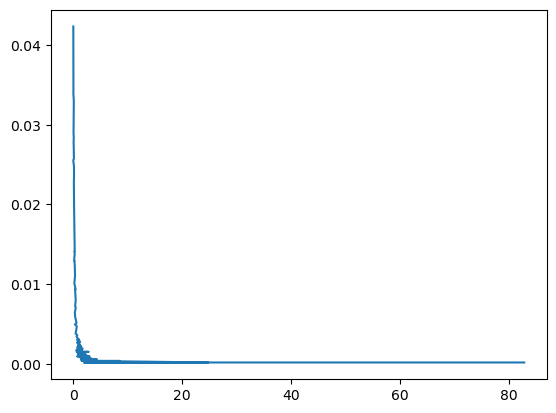

In [86]:
plt.plot(df['Global_Sales'].value_counts(normalize=True))

## Histogramme des variables continues

In [87]:
for col in df.select_dtypes(['float', 'int']):
    print(col)

Year
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
test_note_JVC
avis_count_JVC
avis_note_JVC
Classification_Age_JVC


C:\Users\debor\AppData\Local\Temp\ipykernel_15412\4208727240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\debor\AppData\Local\Temp\ipykernel_15412\4208727240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\debor\AppData\Local\Temp\ipykernel_15412\42

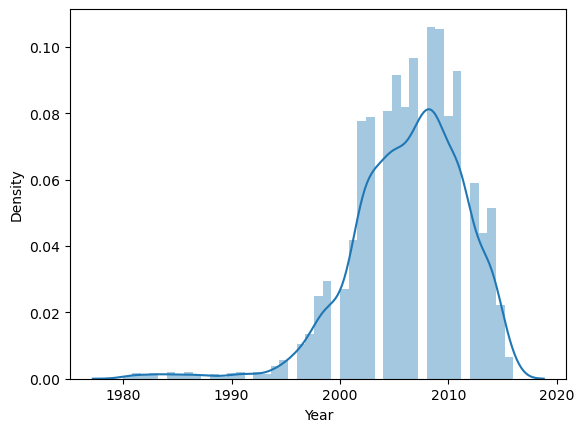

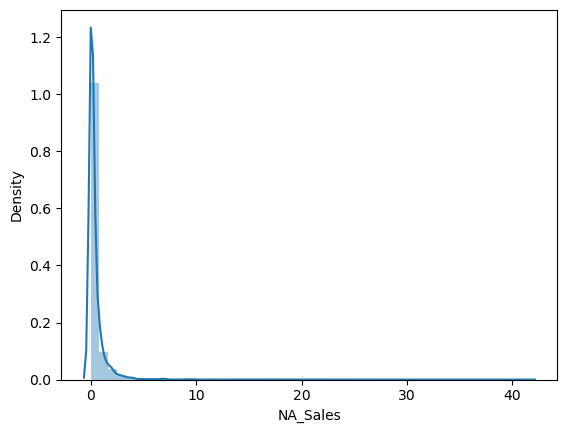

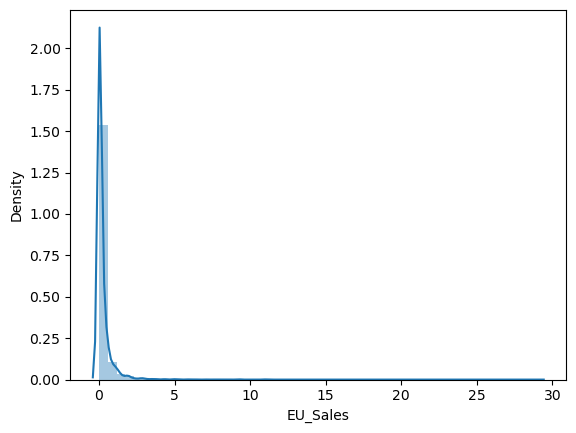

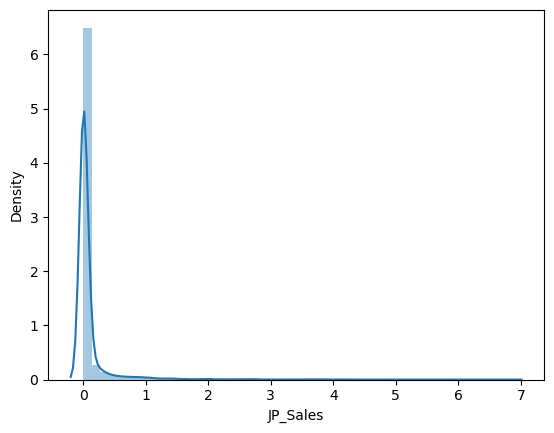

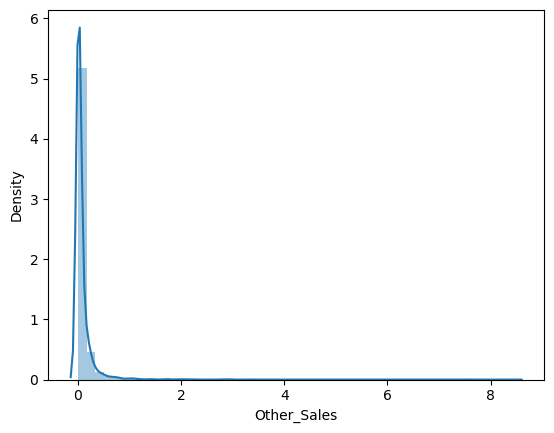

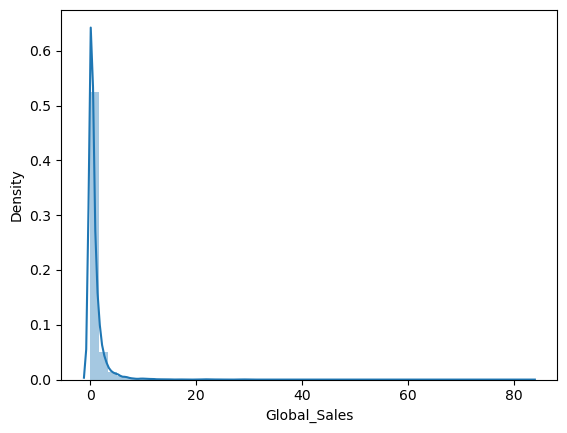

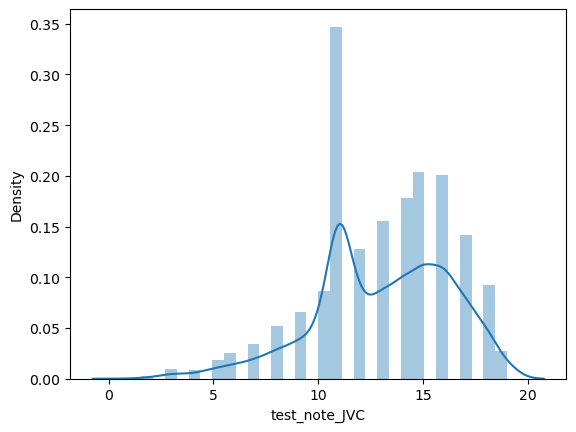

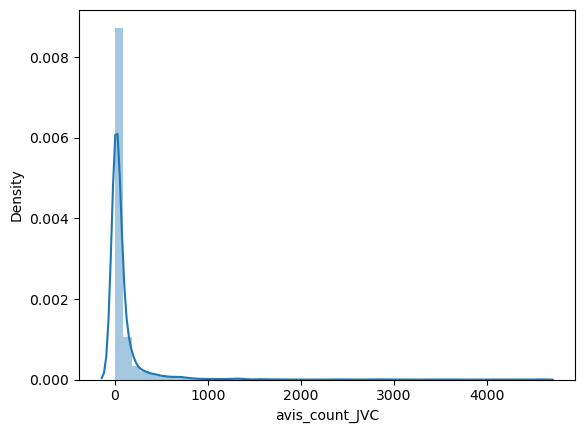

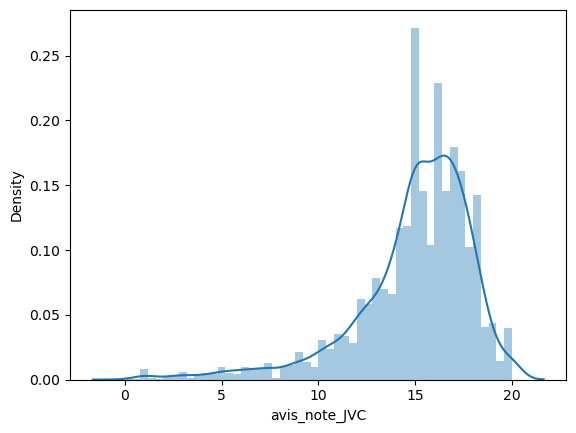

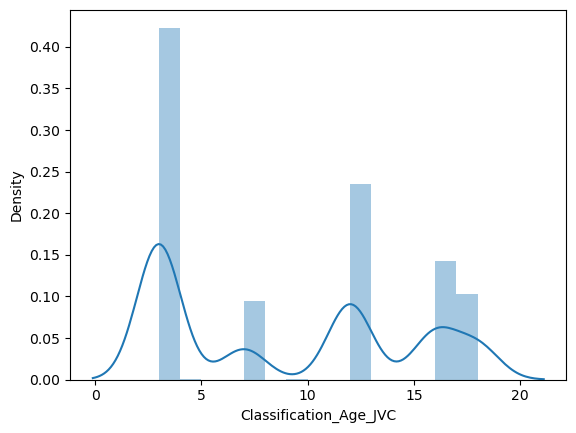

In [88]:
for col in df.select_dtypes(['float', 'int']):
    plt.figure()
    sns.distplot(df[col])

## Variables qualitatives

In [89]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Name---------------------------------------------- ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Breach'
 'Secret Files 2: Puritas Cordis' 'Men in Black II: Alien Escape']
Platform------------------------------------------ ['Wii' 'NES' 'DS' 'X360' 'PS3' 'SNES' 'PS2' 'GB' '3DS' 'PS4' 'N64' 'PS'
 'XB' 'PC' '2600' 'PSP' 'WiiU' 'GC' 'GBA' 'XOne' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG']
Genre--------------------------------------------- ['Sports' 'Platform' 'Racing' 'Misc' 'Simulation' 'Action' 'Role-Playing'
 'Shooter' 'Fighting' 'Adventure' 'Puzzle' 'Strategy']
Publisher----------------------------------------- ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Electronic Arts'
 'SquareSoft' 'Atari' '505 Games' 'GT Interactive'
 'Konami Digital Entertainment' 'Sony Computer Entertainment Europe'
 'Square Enix' 'LucasArts' 'Virgin Interactive'
 'Warner Bros. Interactive Entertainment' 'Capcom' 'Universal Interactive'

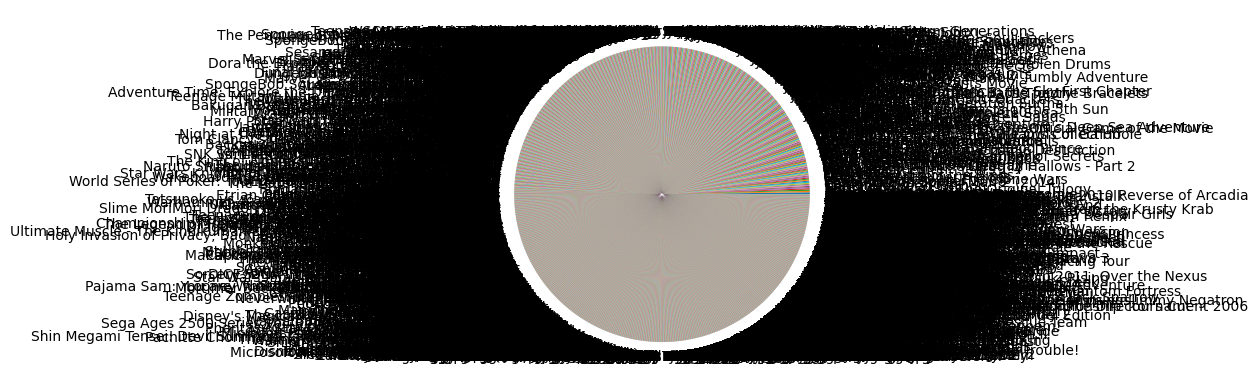

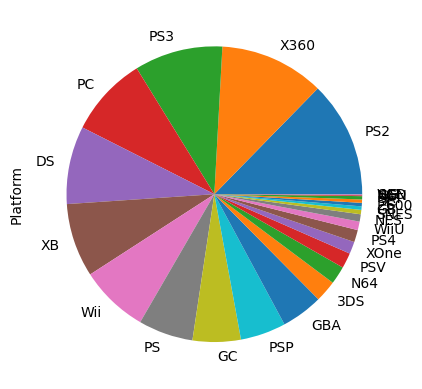

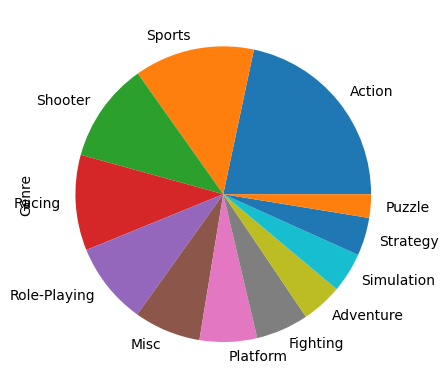

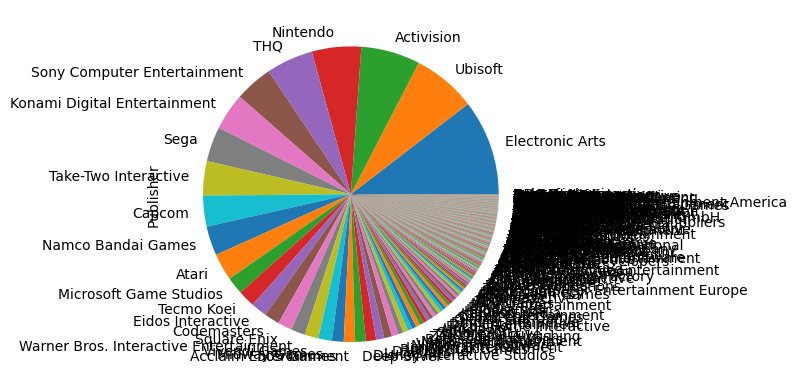

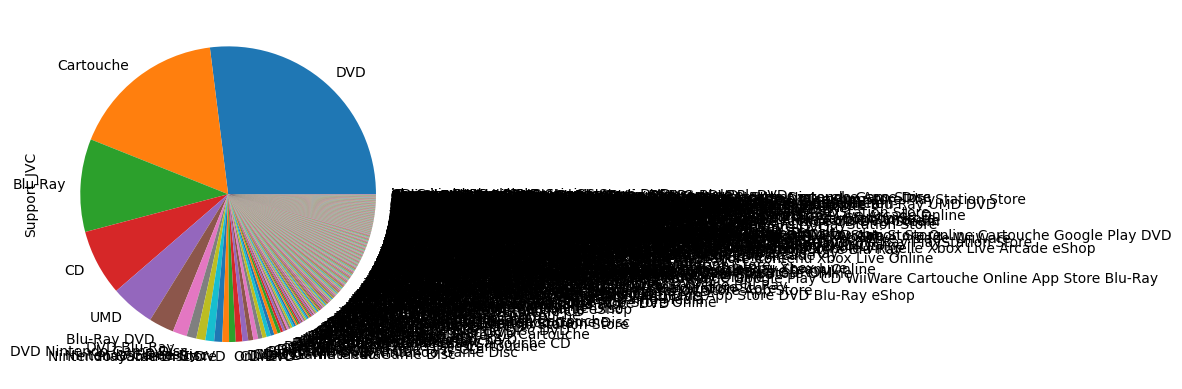

In [90]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target / variables catégorielles

In [91]:
X= df.drop('Global_Sales', axis=1)

C:\Users\debor\AppData\Local\Temp\ipykernel_15412\18815425.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
c:\Users\debor\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

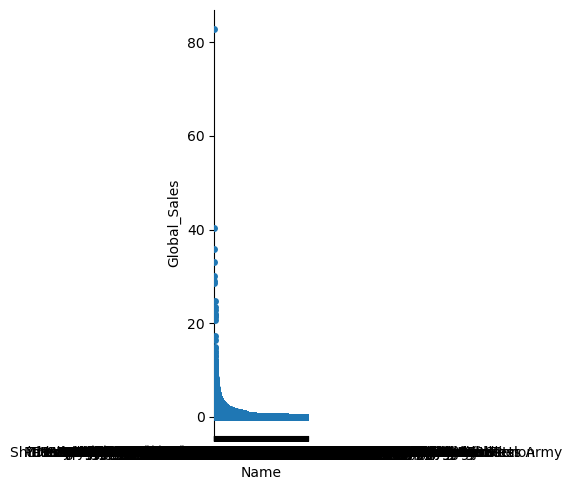

<Figure size 640x480 with 0 Axes>

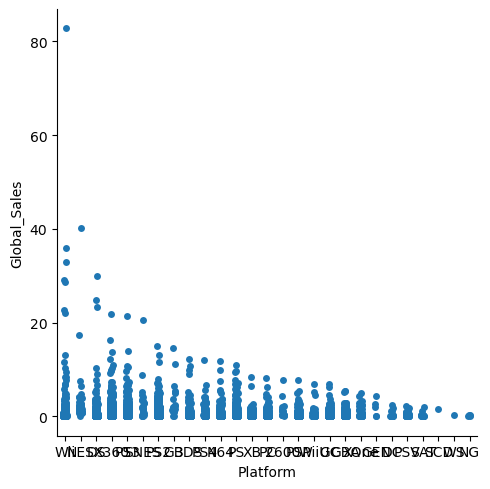

<Figure size 640x480 with 0 Axes>

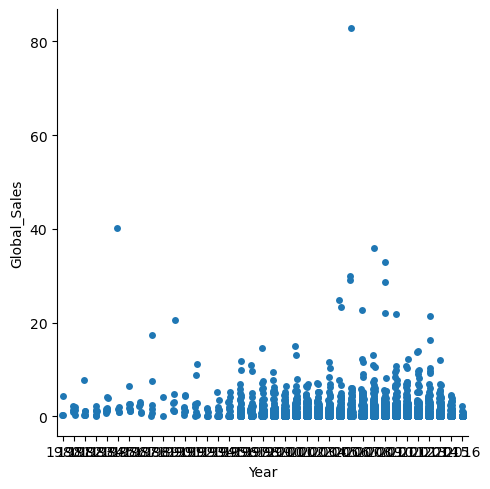

<Figure size 640x480 with 0 Axes>

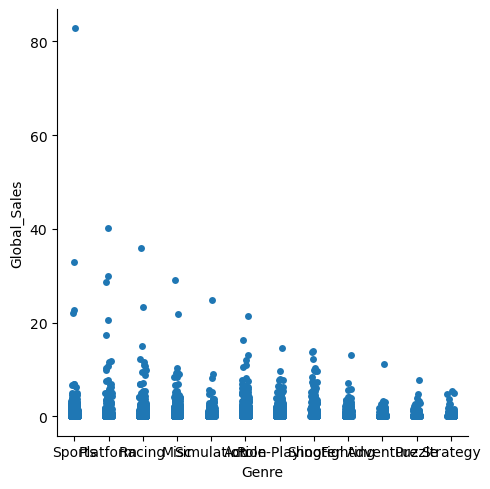

<Figure size 640x480 with 0 Axes>

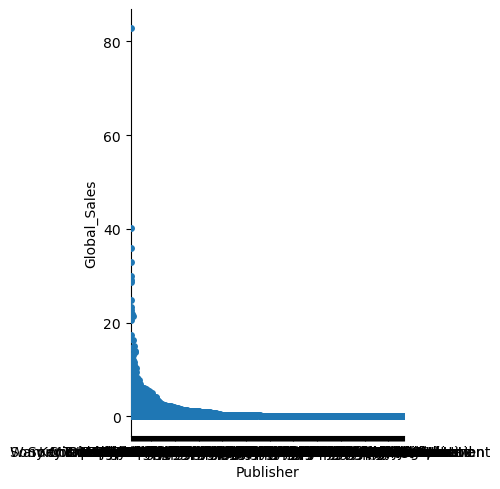

<Figure size 640x480 with 0 Axes>

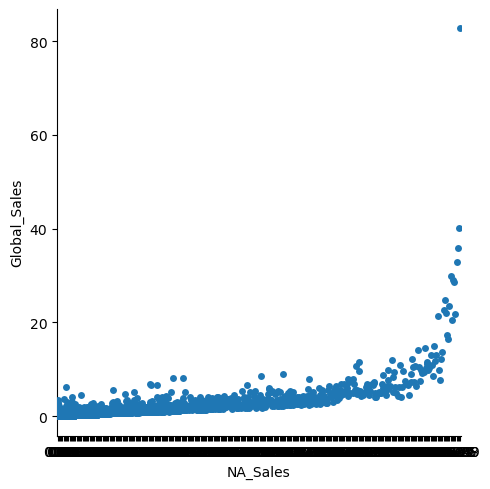

<Figure size 640x480 with 0 Axes>

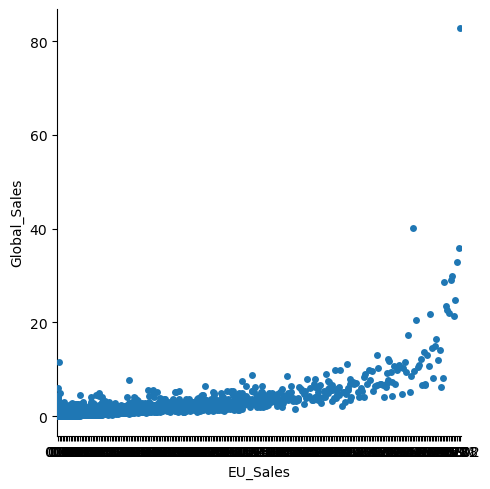

<Figure size 640x480 with 0 Axes>

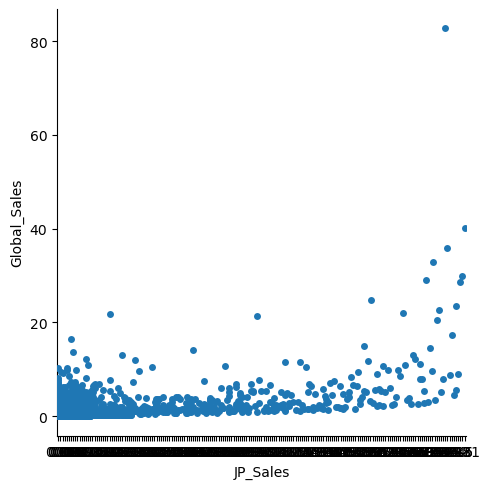

<Figure size 640x480 with 0 Axes>

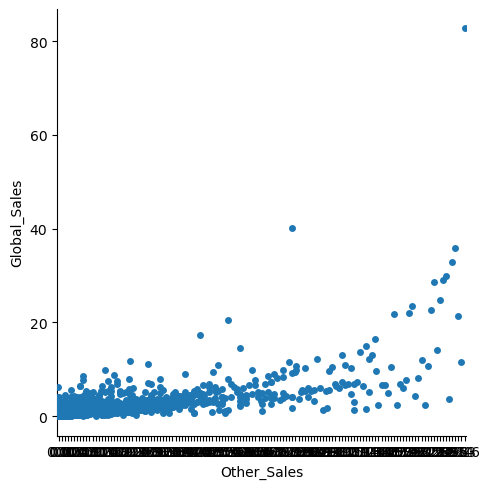

<Figure size 640x480 with 0 Axes>

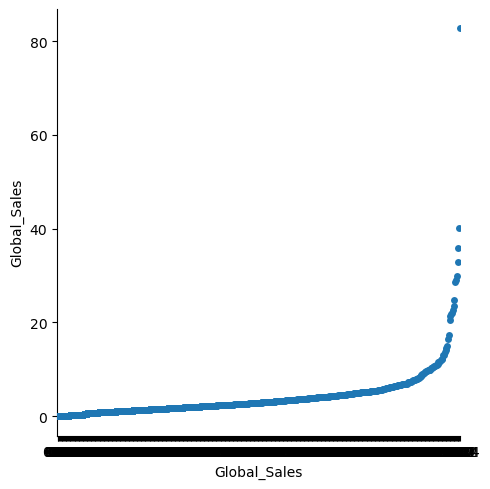

<Figure size 640x480 with 0 Axes>

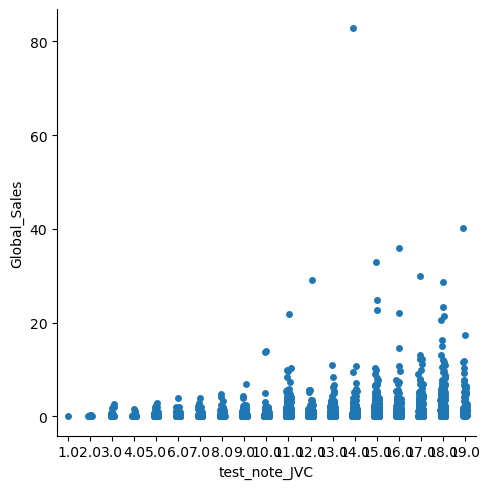

<Figure size 640x480 with 0 Axes>

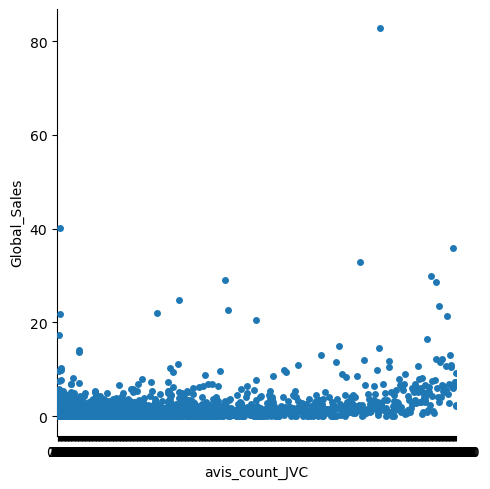

<Figure size 640x480 with 0 Axes>

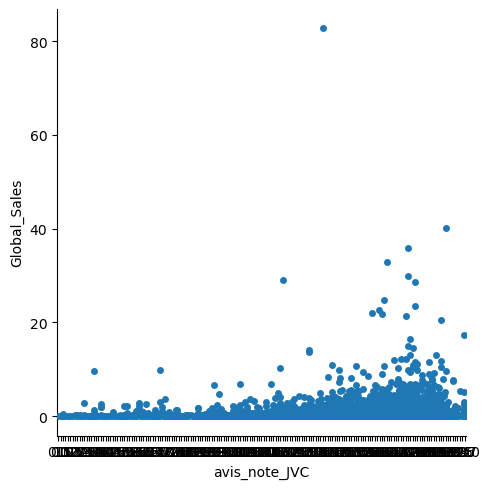

<Figure size 640x480 with 0 Axes>

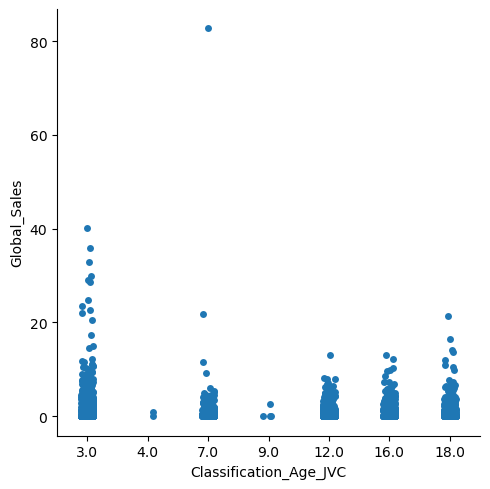

<Figure size 640x480 with 0 Axes>

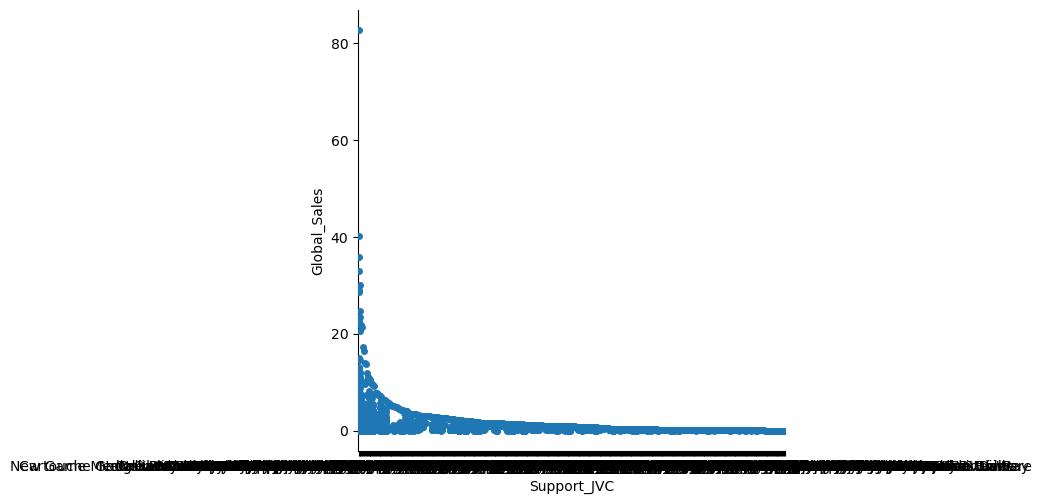

In [92]:
for col in df:
    plt.figure()
    sns.catplot(data=df, x=df[col], y="Global_Sales")


## Encodage des données


In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        
df.head()

Name  Platform  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  3535        22  2006     10        171     41.49     29.02      3.77   
1  2953         9  1985      4        171     29.08      3.58      6.81   
2  1786        22  2008      6        171     15.85     12.88      3.79   
3  3536        22  2009     10        171     15.75     11.01      3.28   
6  2174         3  2006      4        171     11.38      9.23      6.50   

   Other_Sales  Global_Sales  test_note_JVC  avis_count_JVC  avis_note_JVC  \
0         8.46         82.74           14.0           687.0           13.8   
1         0.77         40.24           19.0             3.0           19.0   
2         3.31         35.82           16.0          3023.0           17.4   
3         2.96         33.00           15.0           581.0           16.5   
6         2.90         30.01           17.0          1370.0           17.4   

   Classification_Age_JVC  Support_JVC  
0                     7.0          178  
1                     3.0          450  
2                     3.0          178  
3                     3.0          178  
6                     3.0          111

<Axes: >

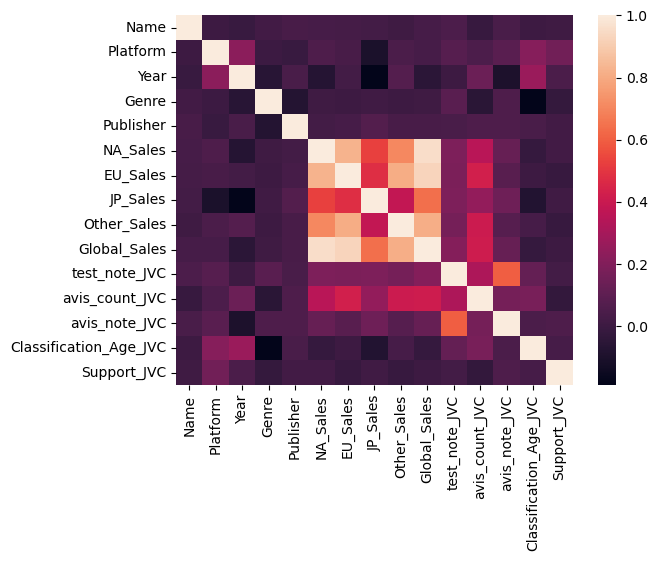

In [94]:
sns.heatmap(df.corr(),annot=False)

In [95]:
df['Global_Sales_group']=pd.qcut(df['Global_Sales'], q=4)

<Axes: xlabel='Global_Sales_group', ylabel='count'>

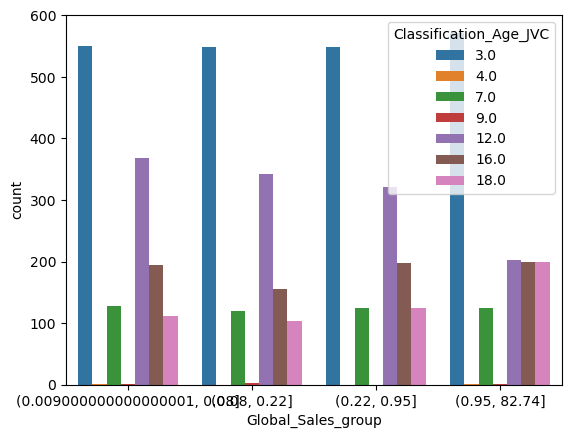

In [96]:
plt.figure()
sns.countplot(x='Global_Sales_group', hue="Classification_Age_JVC", data=df)

In [97]:
pd.crosstab(df['Global_Sales_group'], df['Classification_Age_JVC'], normalize=True)


Classification_Age_JVC            3.0       4.0       7.0       9.0   \
Global_Sales_group                                                     
(0.009000000000000001, 0.08]  0.105032  0.000191  0.024400  0.000191   
(0.08, 0.22]                  0.104651  0.000000  0.022875  0.000381   
(0.22, 0.95]                  0.104461  0.000000  0.023637  0.000000   
(0.95, 82.74]                 0.109035  0.000191  0.023637  0.000191   

Classification_Age_JVC            12.0      16.0      18.0  
Global_Sales_group                                          
(0.009000000000000001, 0.08]  0.070339  0.037171  0.021350  
(0.08, 0.22]                  0.065383  0.029737  0.019825  
(0.22, 0.95]                  0.061189  0.037743  0.023637  
(0.95, 82.74]                 0.038696  0.038124  0.037934

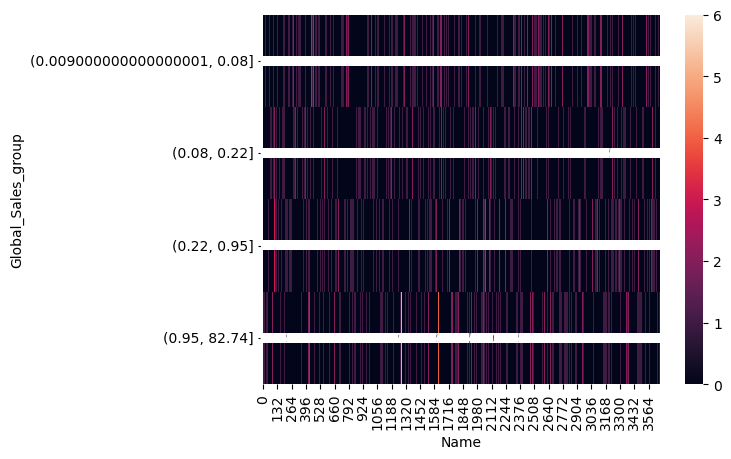

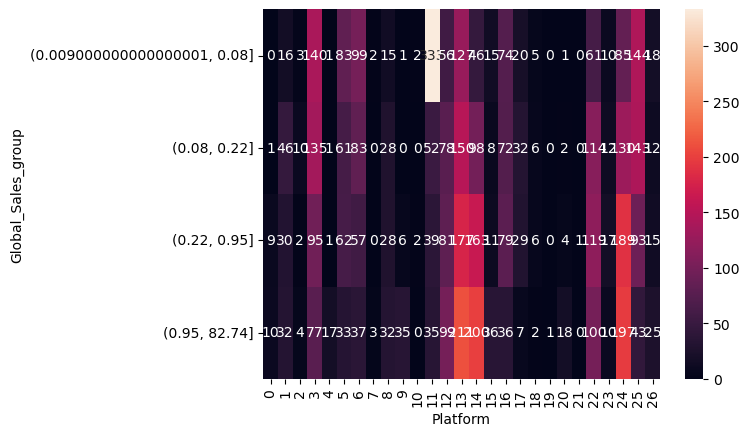

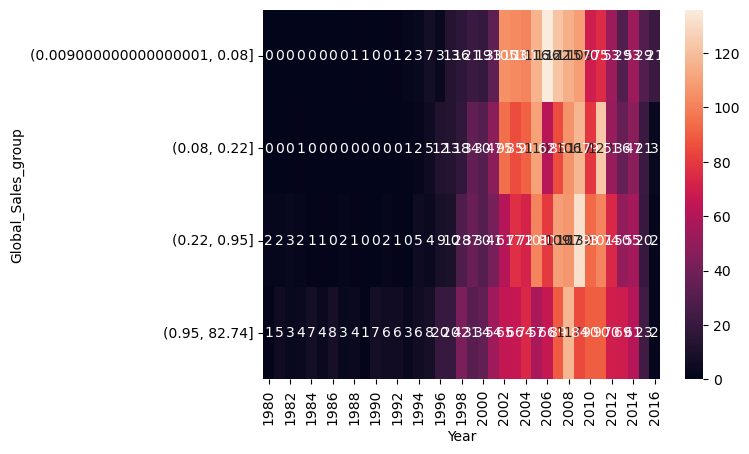

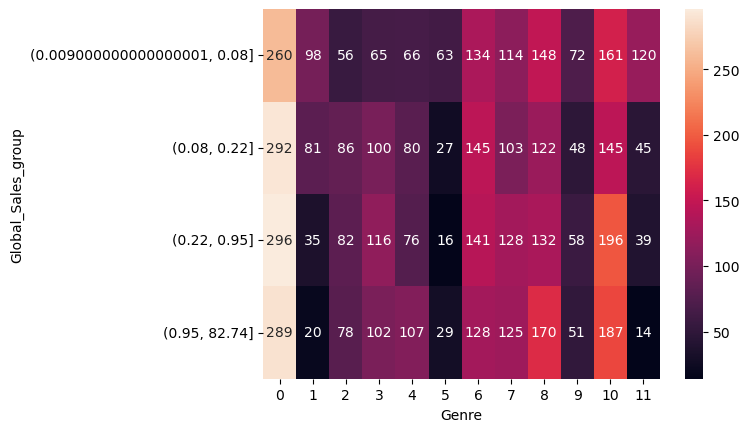

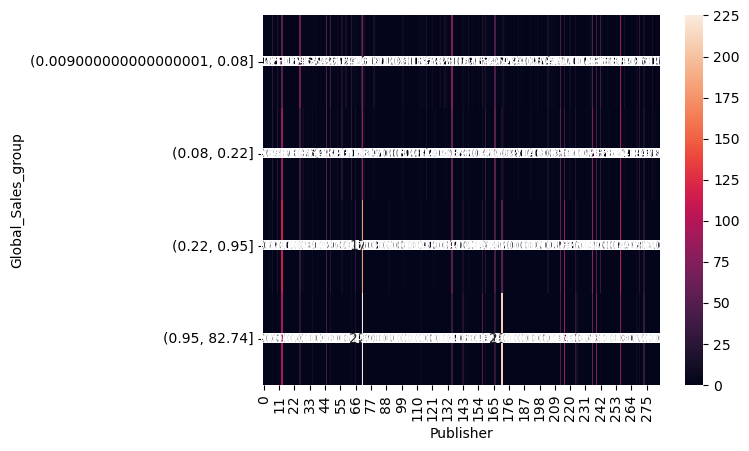

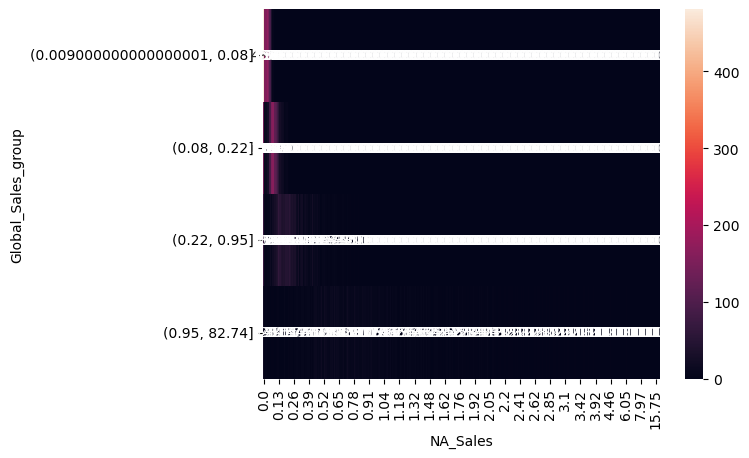

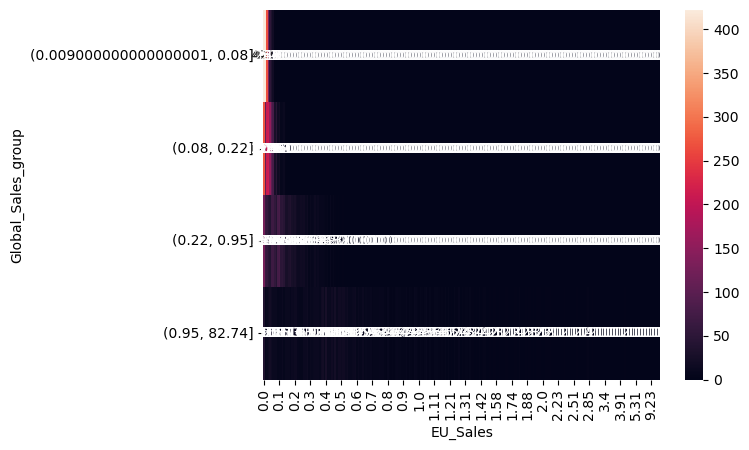

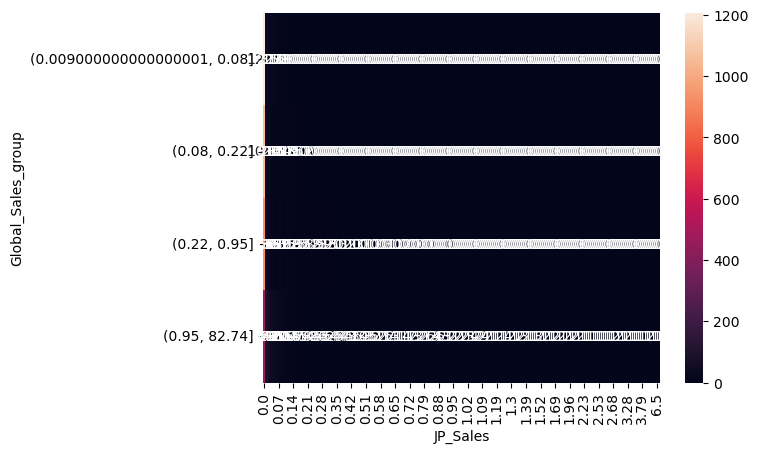

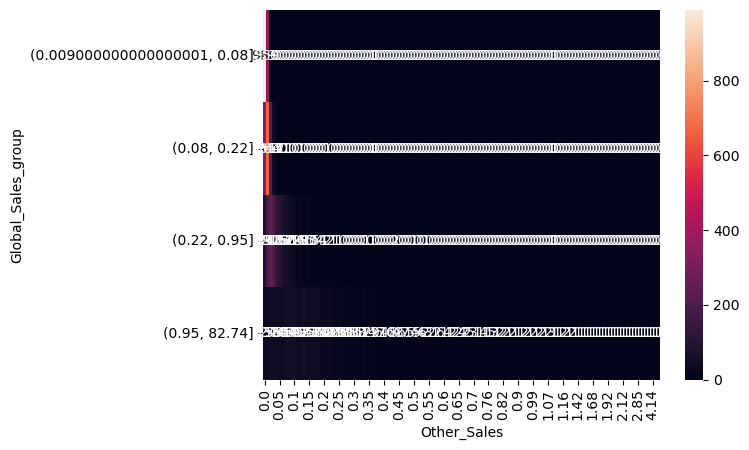

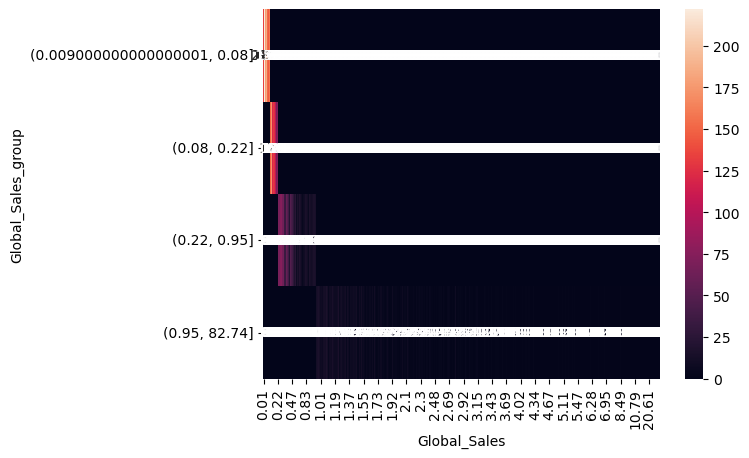

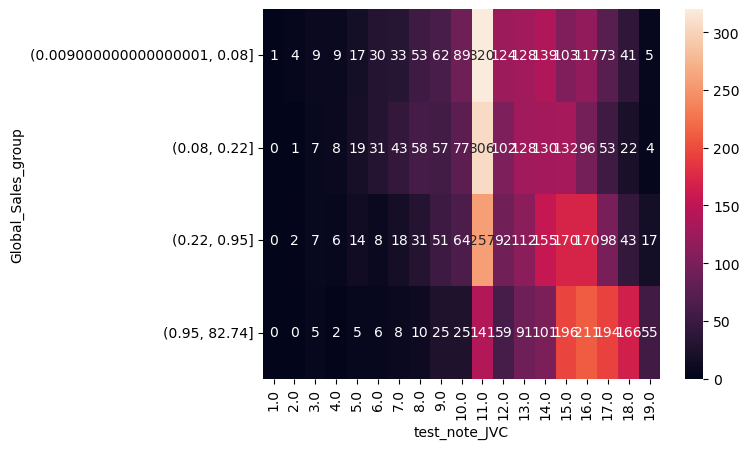

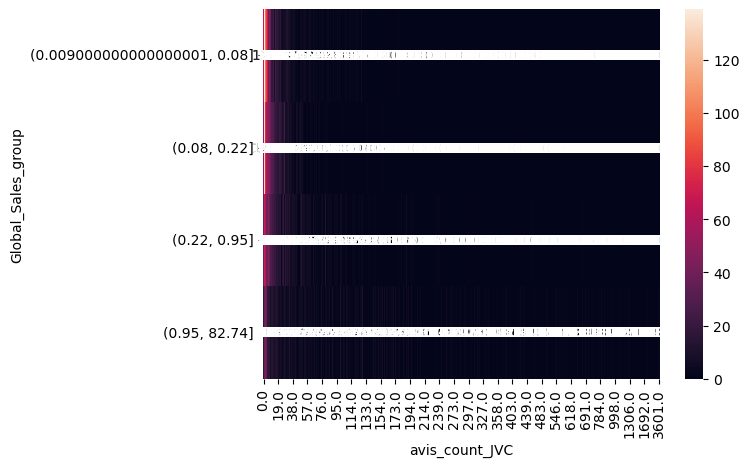

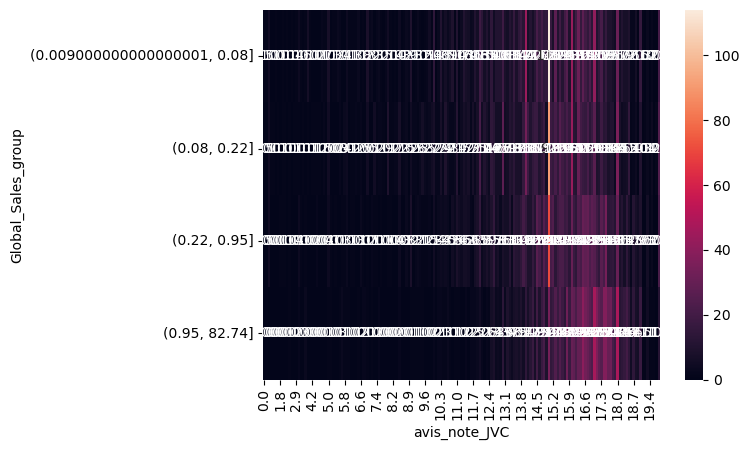

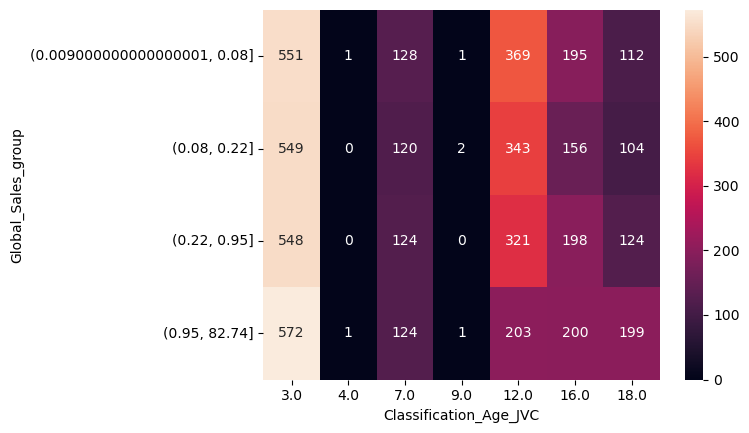

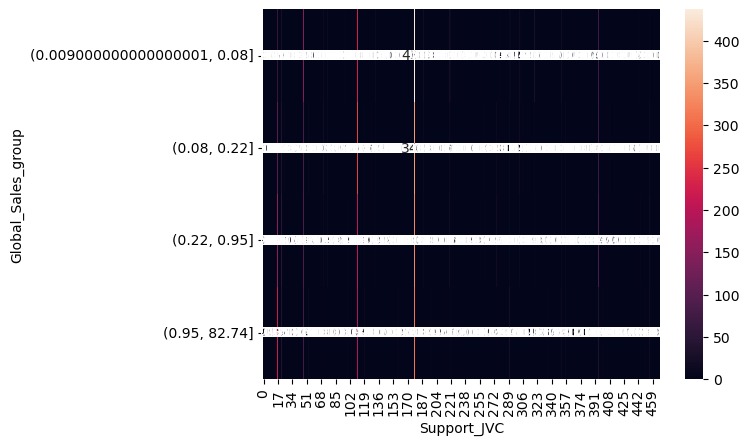

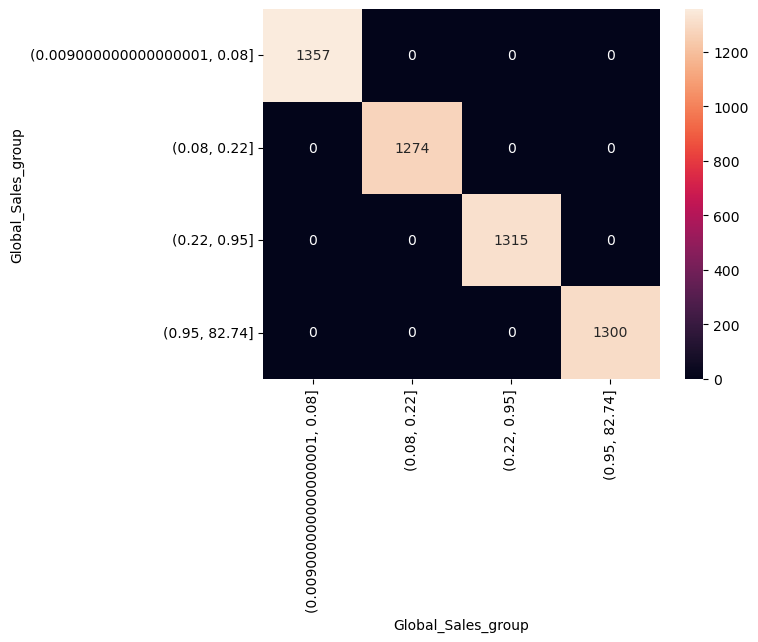

In [98]:
for col in df:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Global_Sales_group'], df[col]), annot=True, fmt='d')

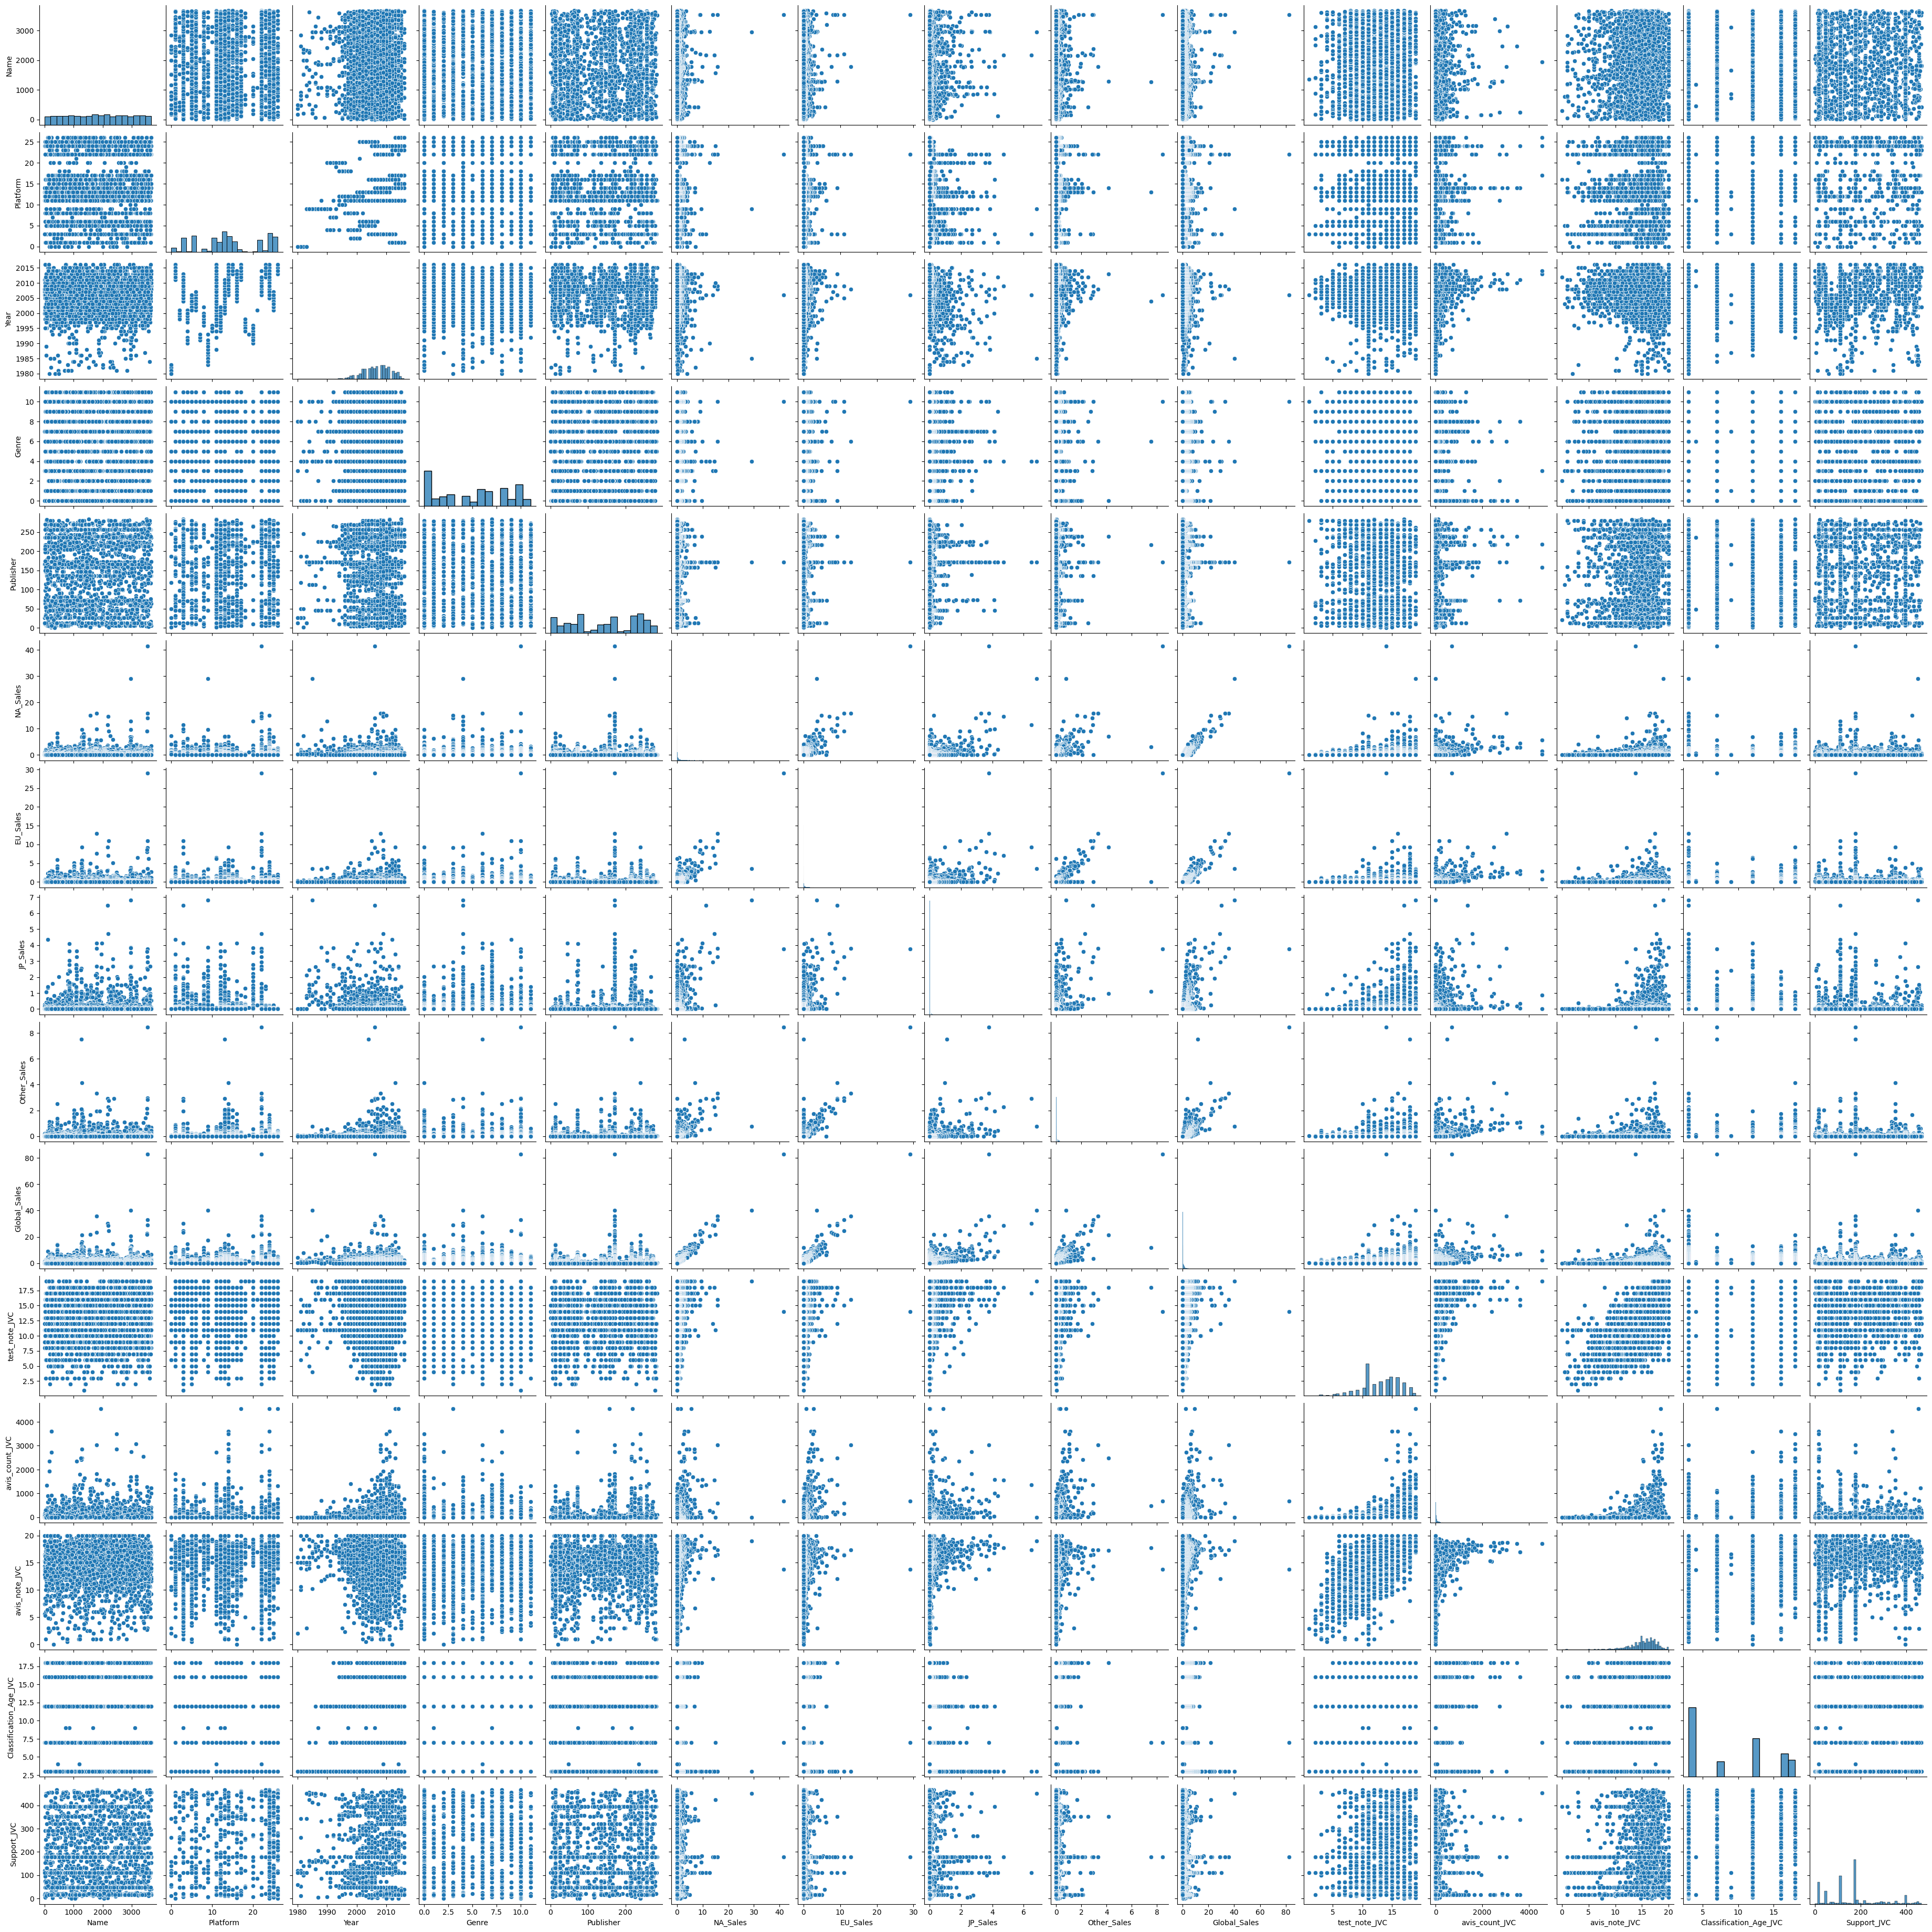

In [99]:
sns.pairplot(df)

C:\Users\debor\AppData\Local\Temp\ipykernel_15412\3135645621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr())


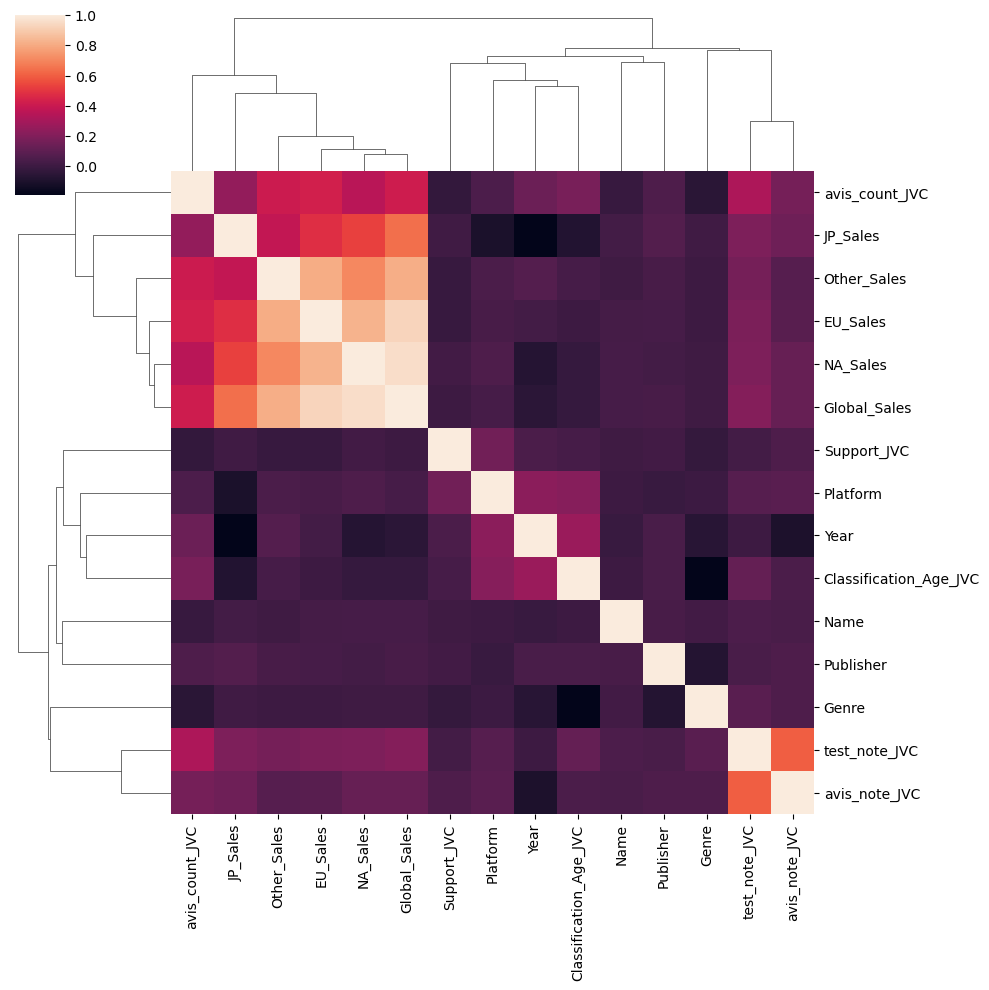

In [100]:
sns.clustermap(df.corr())